# Phase 4 Project

## Time Series Model

Let us start by loading the datasets and see what type of data we are dealing with

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

plt.style.use('ggplot')

Let's load US energy generation

In [2]:
df = pd.read_csv('organised_Gen.csv',
                 parse_dates={ 'date': ['YEAR', 'MONTH'] })
df

,date,Unnamed: 0,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,0,AK,Total Electric Power Industry,Coal,46903.0
1,2001-01-01,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001-01-01,2,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001-01-01,3,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001-01-01,4,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
496769,2022-05-01,10581,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,2022-05-01,10582,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,2022-05-01,10583,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,2022-05-01,10584,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


In [3]:
df.set_index('date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...
2022-05-01,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0


Very interesting! Could pick a couple of energy sources and analyze them in parallel

ok sure

In [4]:
df['ENERGY SOURCE'].value_counts()

Total                             73356
Natural Gas                       66684
Petroleum                         63176
Coal                              47642
Other Biomass                     46148
Hydroelectric Conventional        38842
Other                             36241
Wood and Wood Derived Fuels       30524
Wind                              25421
Solar Thermal and Photovoltaic    19393
Other Gases                       18212
Nuclear                           16754
Pumped Storage                    10139
Geothermal                         4242
Name: ENERGY SOURCE, dtype: int64

In [108]:
# df['STATE'].value_counts()

In [6]:
#TX=df.loc[df['STATE']=='TX']
#TX

In [7]:
#NY=df.loc[df['STATE']=='NY']
#NY

In [8]:
#TX['ENERGY SOURCE']

In [9]:
#TX_oil=TX.loc[TX['ENERGY SOURCE']=='Petroleum']

In [10]:
#TX_oil

In [11]:
#TX_oilf=TX_oil.loc[TX_oil['TYPE OF PRODUCER']=='Total Electric Power Industry']

In [12]:
#TX_oilf

In [13]:
#TX_oilf['GENERATION (Megawatthours)'].plot();

In [14]:
#TX_oilg=TX_oilf.iloc[1: , :]

In [15]:
#TX_oilg

In [16]:
#TX_oilg.index

In [17]:
"""fig = plt.figure(figsize=(15,10))
#plt.plot(solar)
plt.plot(TX_oilg.index,TX_oilg['GENERATION (Megawatthours)'])
plt.xticks(rotation=90)
plt.show()"""

"fig = plt.figure(figsize=(15,10))\n#plt.plot(solar)\nplt.plot(TX_oilg.index,TX_oilg['GENERATION (Megawatthours)'])\nplt.xticks(rotation=90)\nplt.show()"

In [18]:
#TX_sol=TX.loc[TX['ENERGY SOURCE']=='Solar Thermal and Photovoltaic']

In [19]:
#TX_sol

In [20]:
#TX_solt=TX_sol.loc[TX_sol['TYPE OF PRODUCER']=='Total Electric Power Industry']

In [21]:
#TX_solt['GENERATION (Megawatthours)'].plot();

In [22]:
#solar=TX_solt['2012':]

In [23]:
#solar['GENERATION (Megawatthours)'].plot();

In [24]:
US_total=df.loc[df['TYPE OF PRODUCER']=='Total Electric Power Industry']
US_total=US_total.loc[US_total['STATE']=='US-TOTAL']

#total_gen=data[data["STATE"]=="US-TOTAL"]
#total_gen=total_gen[(total_gen["TYPE OF PRODUCER"]!="Total Electric Power Industry")

In [25]:
US_total

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,
2001-01-01,US-TOTAL,Total Electric Power Industry,Coal,177287111.0
2001-01-01,US-TOTAL,Total Electric Power Industry,Petroleum,18111843.0
2001-01-01,US-TOTAL,Total Electric Power Industry,Natural Gas,42388663.0
2001-01-01,US-TOTAL,Total Electric Power Industry,Other Gases,718442.0
2001-01-01,US-TOTAL,Total Electric Power Industry,Nuclear,68707077.0
...,...,...,...,...
2022-05-01,US-TOTAL,Total Electric Power Industry,Petroleum,1524488.0
2022-05-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,15151118.0
2022-05-01,US-TOTAL,Total Electric Power Industry,Other Biomass,1440366.0


In [26]:
US_total['ENERGY SOURCE'].value_counts()

Other Biomass                     257
Pumped Storage                    257
Other Gases                       257
Nuclear                           257
Wood and Wood Derived Fuels       257
Wind                              257
Coal                              257
Other                             257
Geothermal                        257
Natural Gas                       257
Hydroelectric Conventional        257
Total                             257
Petroleum                         257
Solar Thermal and Photovoltaic    257
Name: ENERGY SOURCE, dtype: int64

In [27]:
US_source=US_total.groupby(by=[US_total.index,"ENERGY SOURCE"]).sum().reset_index()

In [28]:
US_source=US_source[(US_source['ENERGY SOURCE']!='Total')]

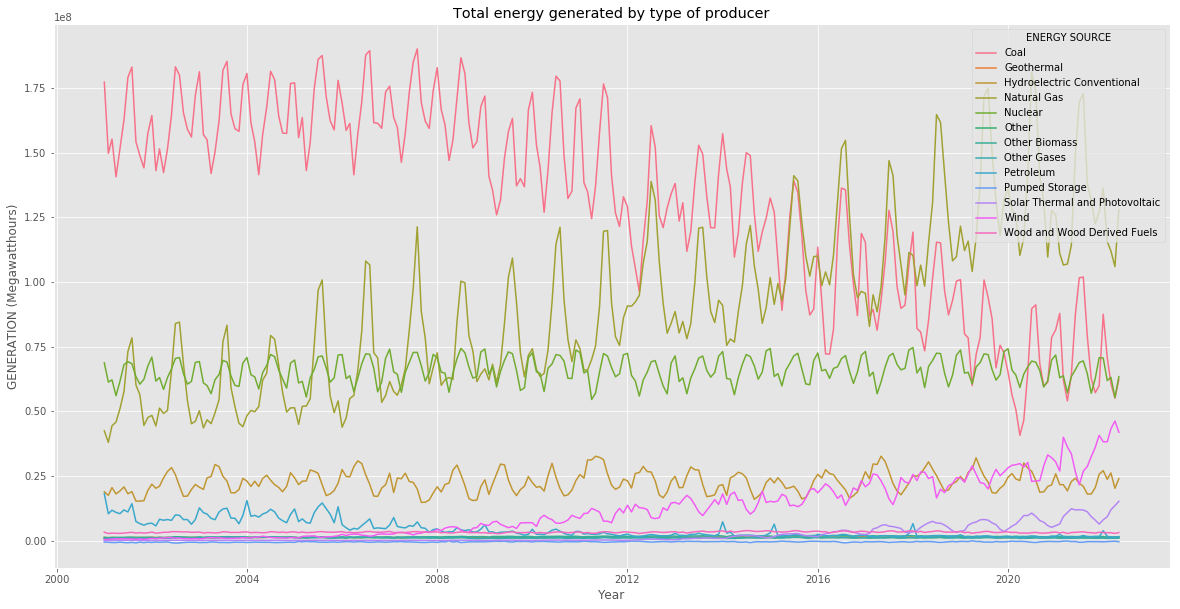

In [29]:
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=US_source, x=US_source['date'] ,y=US_source["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
#Plot additional properties
#plt.grid()
#plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()


Let us divide up the energy sources to be able to better see form the graphs their trends.

In [30]:
top_3 = ['Coal' ,'Natural Gas', 'Nuclear'] 
US_top3=US_source[US_source['ENERGY SOURCE'].isin(top_3)]

In [31]:
US_top3

,date,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,Coal,177287111.0
3,2001-01-01,Natural Gas,42388663.0
4,2001-01-01,Nuclear,68707077.0
14,2001-02-01,Coal,149735484.0
17,2001-02-01,Natural Gas,37966927.0
...,...,...,...
3573,2022-04-01,Natural Gas,105934050.0
3574,2022-04-01,Nuclear,55289540.0
3584,2022-05-01,Coal,62288238.0
3587,2022-05-01,Natural Gas,127926186.0


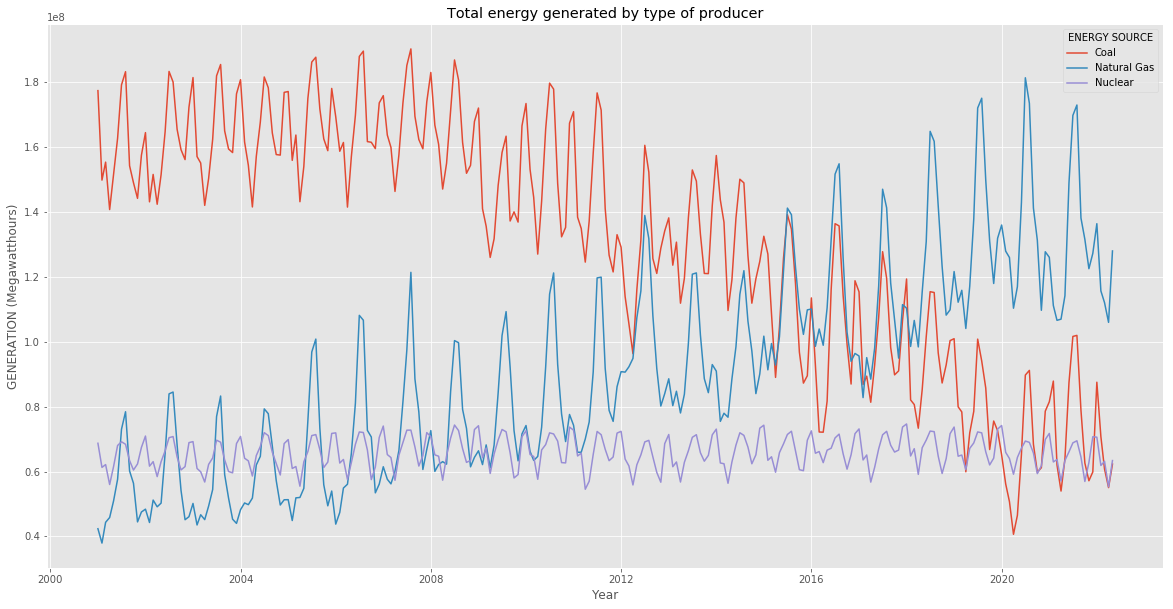

In [32]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_top3, x=US_top3['date'] ,y=US_top3["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()


In [33]:
snd_4 = ['Wind' ,'Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Petroleum'] 
US_snd4=US_source[US_source['ENERGY SOURCE'].isin(snd_4)]

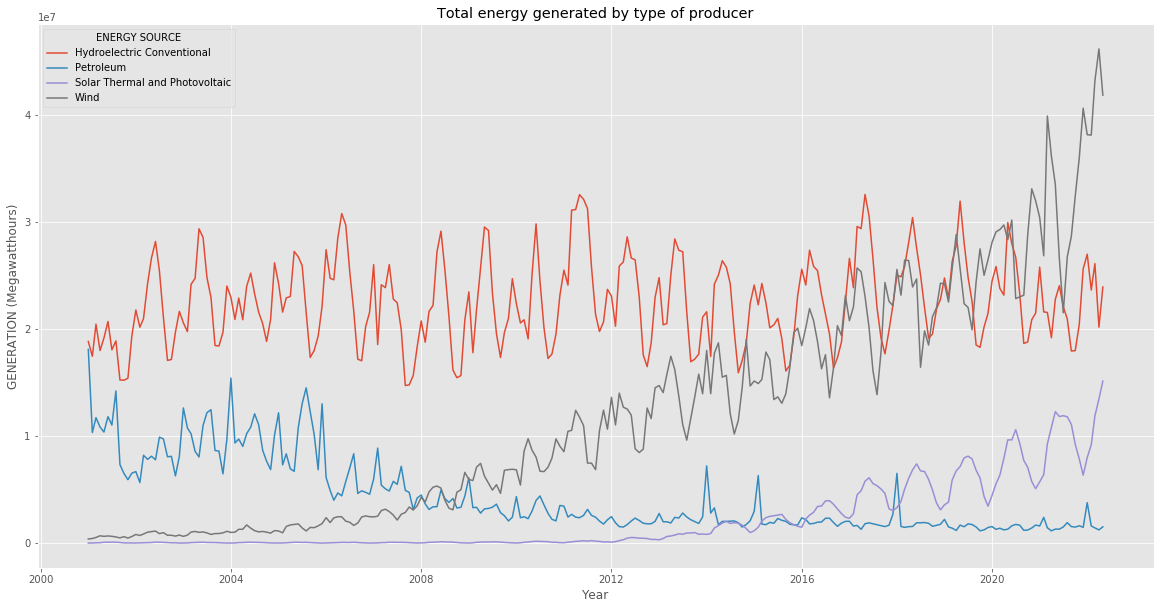

In [34]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_snd4, x=US_snd4['date'] ,y=US_snd4["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()

In [35]:
bottom=['Other','Other Gases','Pumped Storage','Wood and Wood Derived Fuels'\
        ,'Other Biomass','Geothermal']
US_bot=US_source[US_source['ENERGY SOURCE'].isin(bottom)]

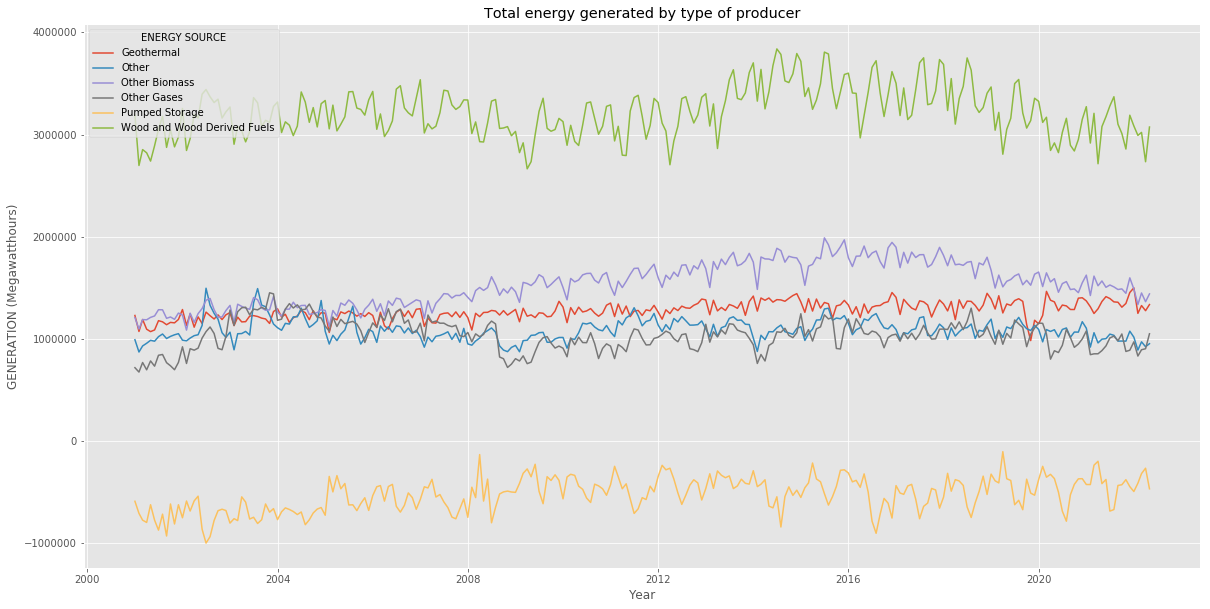

In [36]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_bot, x=US_bot['date'] ,y=US_bot["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()

The trends that have shown to be more interesting, with an upward trend over time are:
 Natural Gas, Wind and Solar. So let us preview those.

In [37]:
#US_coal=US_total.loc[US_total['ENERGY SOURCE']=='Coal']

In [38]:
#US_coal.plot();

In [39]:
#US_oil=US_total.loc[US_total['ENERGY SOURCE']=='Petroleum']
#US_oil.plot();

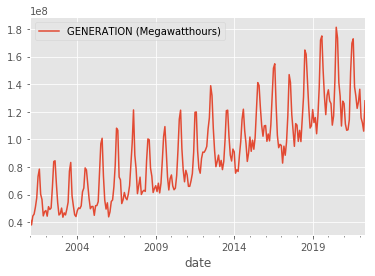

In [40]:
US_nat=US_total.loc[US_total['ENERGY SOURCE']=='Natural Gas']
US_nat.plot();

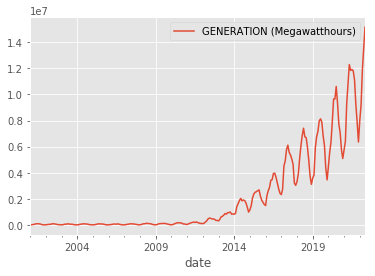

In [41]:
US_sol=US_total.loc[US_total['ENERGY SOURCE']=='Solar Thermal and Photovoltaic']
US_sol.plot();

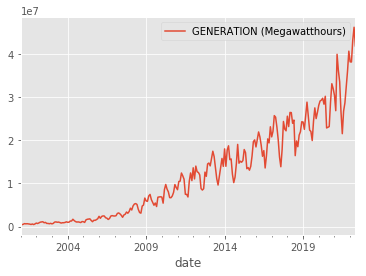

In [42]:
US_wind=US_total.loc[US_total['ENERGY SOURCE']=='Wind']
US_wind.plot();

> Maybe here could add also histogram or density plot

### Subtracting Rolling Mean

In [43]:
roll_mean = US_nat.rolling(window=8, center=False).mean()
roll_std = US_nat.rolling(window=8, center=False).std()

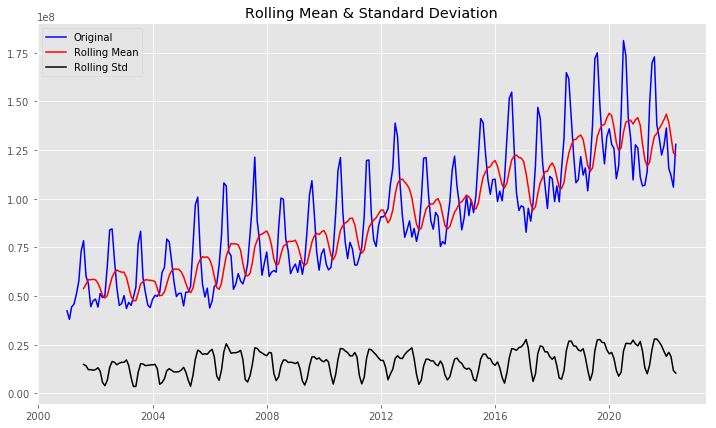

In [44]:
fig = plt.figure(figsize=(12,7))
plt.plot(US_nat["GENERATION (Megawatthours)"], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [45]:
dftest = adfuller(US_nat["GENERATION (Megawatthours)"])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-0.37362259172173357, 0.9144105810373795, 14, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 8208.616264228112)


In [46]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -0.373623
p-value                          0.914411
#Lags Used                      14.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [47]:
wind=US_wind["GENERATION (Megawatthours)"]
nat=US_nat["GENERATION (Megawatthours)"]
sol=US_sol["GENERATION (Megawatthours)"]
#coal=US_coal["GENERATION (Megawatthours)"]
#oil=US_oil["GENERATION (Megawatthours)"]

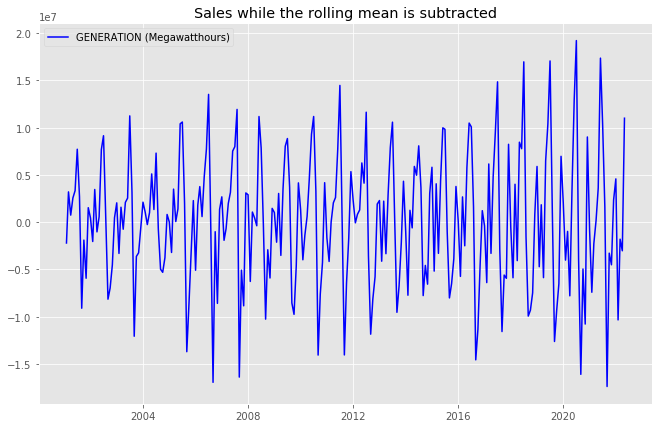

In [48]:
roll_mean_nat = US_nat['GENERATION (Megawatthours)'].rolling(window=2, center=False).mean()
# Subtract the moving average from the original data
data_mrm_nat = nat - roll_mean_nat
# Drop the missing values from time series calculated above
data_mrm_nat.dropna(inplace=True)
# Plot sales with rolling mean subtracted
fig = plt.figure(figsize=(11,7))
plt.plot(data_mrm_nat, color='blue')#,label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show();#(block=False)

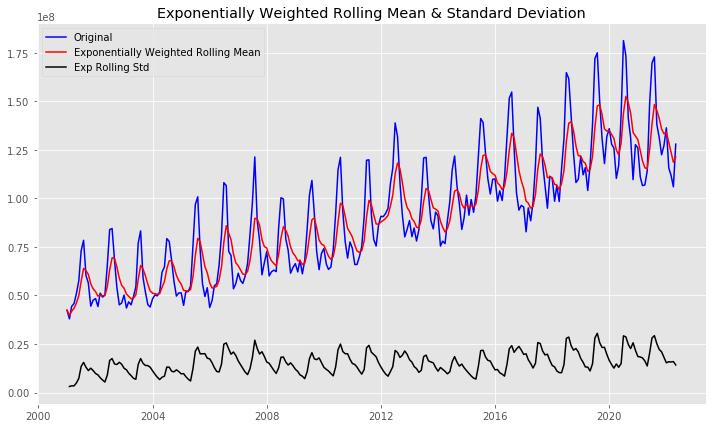

In [49]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = nat.ewm(halflife=2).mean()
roll_std = nat.ewm(halflife=2).std()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(nat, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.plot(roll_std, color='black', label = 'Exp Rolling Std')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

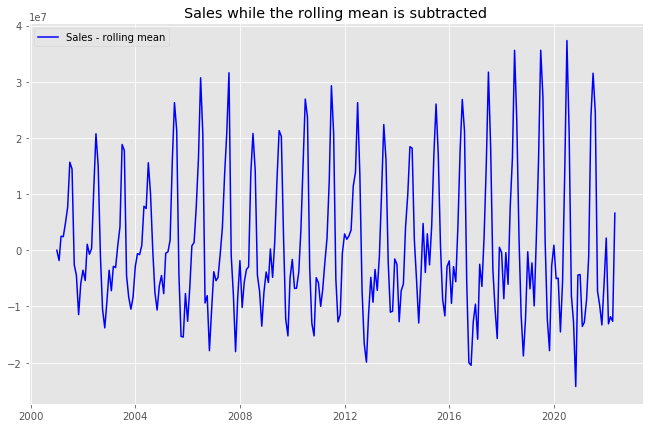

In [50]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = nat - exp_roll_mean
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [51]:
dftest = adfuller(data_mrm_nat)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.136855
p-value                          0.000841
#Lags Used                      13.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [52]:
dftest = adfuller(data_minus_exp_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.995365
p-value                          0.000023
#Lags Used                      15.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


> Here maybe a paragraph in which you explain what it means, the fact that the residualas are stationary and why do we subract the rolling mean, because there is a dependence on the previous periods, specifically the amounts of periods specified in the window. And that expotential means the ones closer in time are more relevant then the others.

## Series Decomposition

**When log is better than natural, is because the trend is exponential (grothw in our case) inste of linear growth.**

### Decomposing Natural Gas Log and then normal

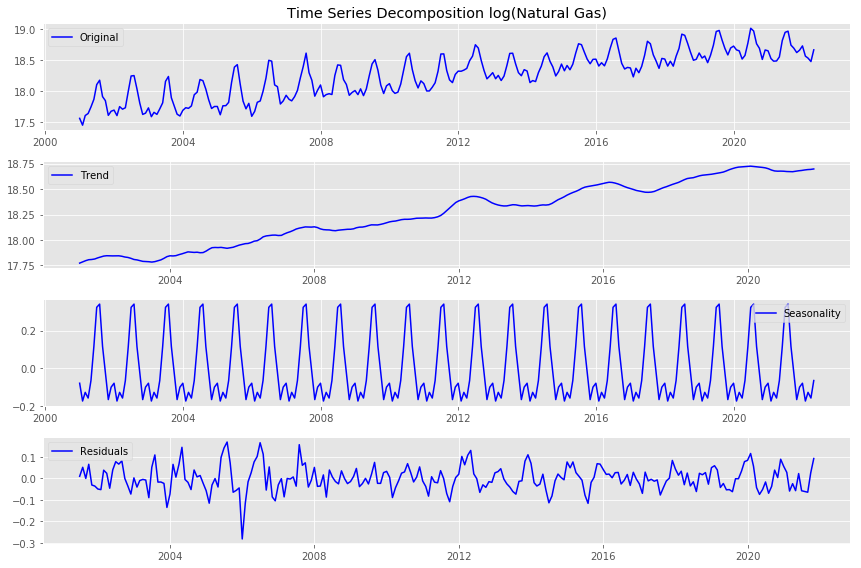

In [53]:
decomposition = seasonal_decompose(np.log(nat))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Natural Gas)')
plt.plot(np.log(nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [54]:
residual.dropna(inplace=True)

In [55]:
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.729587e+00
p-value                        9.079601e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


### Decomposing Natural Gas

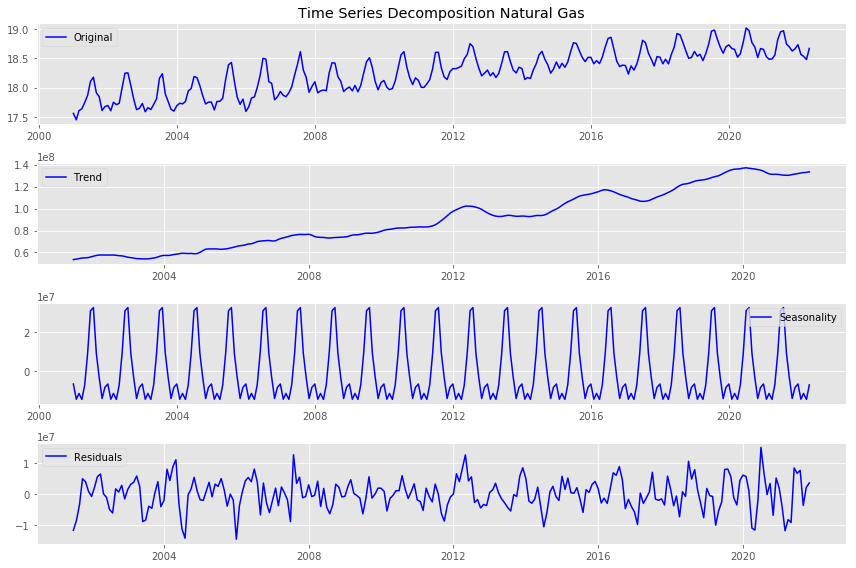

In [56]:
decomposition = seasonal_decompose((nat))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural Gas')
plt.plot(np.log(nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [57]:
residual.dropna(inplace=True)

In [58]:
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.881169e+00
p-value                        3.766672e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [59]:
""" THIS IS STILL A QUESTION IN TERMS OF DOES IT MAKE SENSE TO DO
DECOMPOSITION WITH data minus mean

decomposition = seasonal_decompose(np.log(data_minus_exp_roll_mean[2:]))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()"""

" THIS IS STILL A QUESTION IN TERMS OF DOES IT MAKE SENSE TO DO\nDECOMPOSITION WITH data minus mean\n\ndecomposition = seasonal_decompose(np.log(data_minus_exp_roll_mean[2:]))\n\n# Gather the trend, seasonality, and residuals \ntrend = decomposition.trend\nseasonal = decomposition.seasonal\nresidual = decomposition.resid\n\n# Plot gathered statistics\nplt.figure(figsize=(12,8))\nplt.subplot(411)\nplt.plot(np.log(data), label='Original', color='blue')\nplt.legend(loc='best')\nplt.subplot(412)\nplt.plot(trend, label='Trend', color='blue')\nplt.legend(loc='best')\nplt.subplot(413)\nplt.plot(seasonal,label='Seasonality', color='blue')\nplt.legend(loc='best')\nplt.subplot(414)\nplt.plot(residual, label='Residuals', color='blue')\nplt.legend(loc='best')\nplt.tight_layout()"

### Decomposing log(Wind)

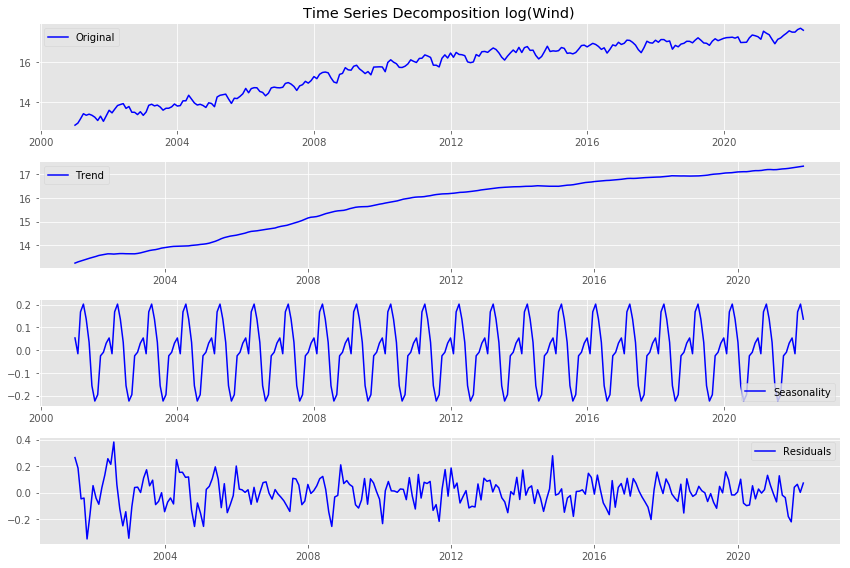

In [60]:
decomposition = seasonal_decompose(np.log(wind))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Wind)')
plt.plot(np.log(wind), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

In [61]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.379534e+00
p-value                        2.532097e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


### Decomposing Wind

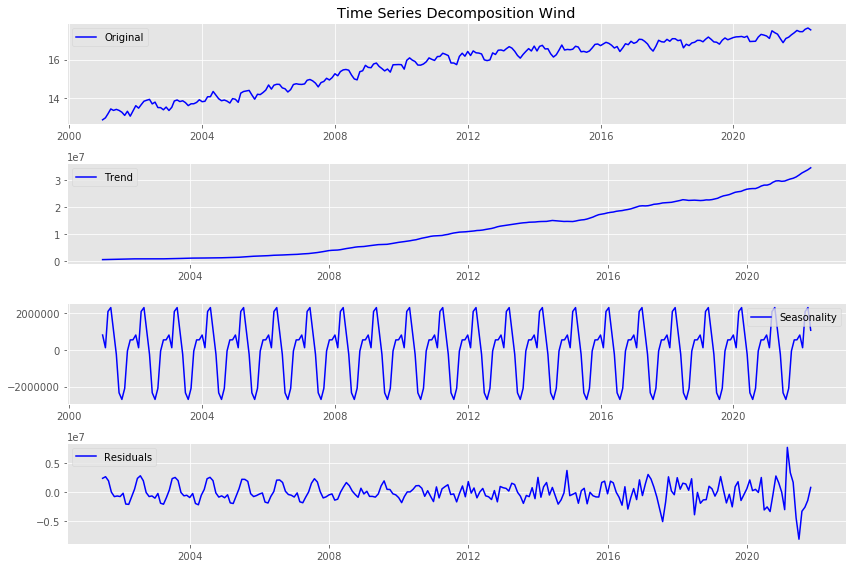

In [62]:
decomposition = seasonal_decompose(wind)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Wind')
plt.plot(np.log(wind), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

In [63]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.887717e+00
p-value                        1.380833e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


### Decomposing log(solar)

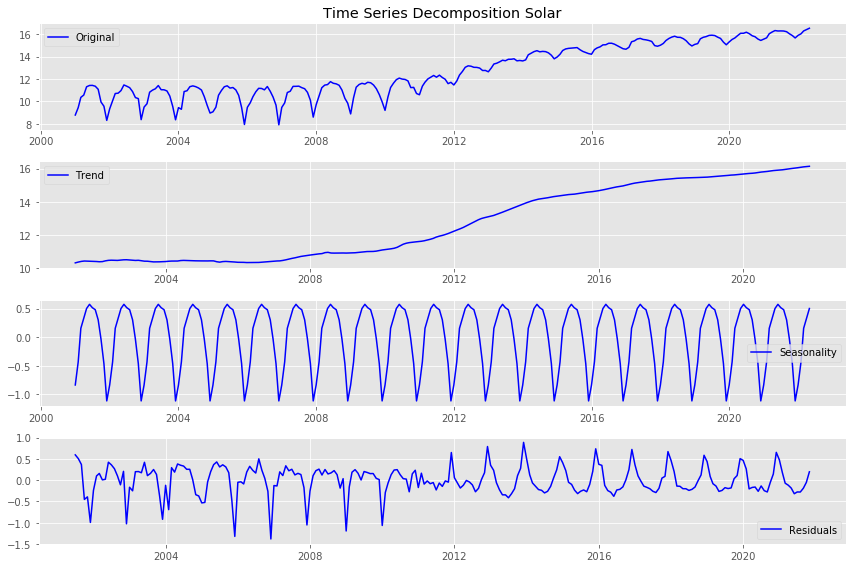

In [64]:
decomposition = seasonal_decompose(np.log(sol))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [65]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -7.054246e+00
p-value                        5.426813e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


### Decomposing Solar

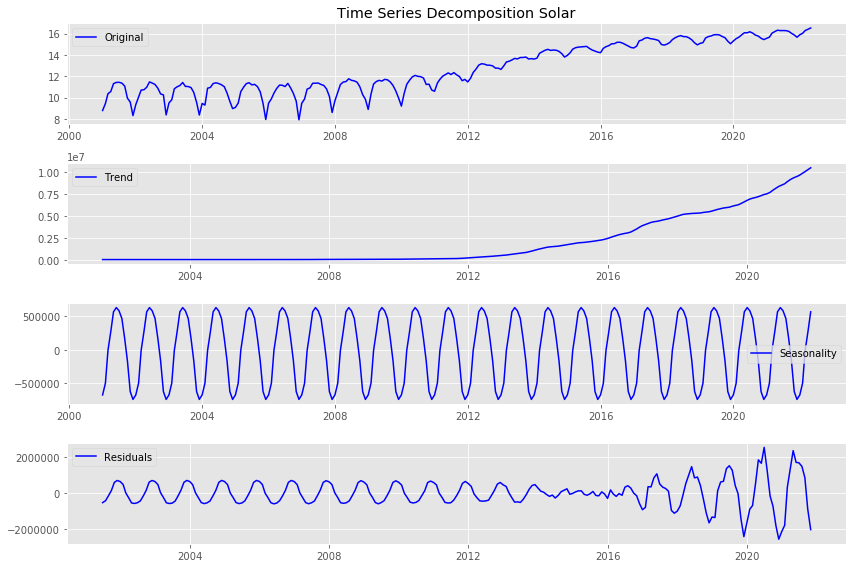

In [66]:
decomposition = seasonal_decompose(sol)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [67]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.463898e+00
p-value                        4.280951e-16
#Lags Used                     1.000000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


It seems like something else is going on with solar.
I want to see if the decomposition will work better once I cut out the part that was basically zero.

In [68]:
sol

date
2001-01-01        6500.0
2001-02-01       12568.0
2001-03-01       31498.0
2001-04-01       38759.0
2001-05-01       81053.0
                 ...    
2022-01-01     8003896.0
2022-02-01     9202560.0
2022-03-01    11890566.0
2022-04-01    13484080.0
2022-05-01    15151118.0
Name: GENERATION (Megawatthours), Length: 257, dtype: float64

In [69]:
US_sol.describe()

,GENERATION (Megawatthours)
count,2.570000e+02
mean,2.147669e+06
std,3.235459e+06
min,2.713000e+03
25%,6.024300e+04
50%,1.760530e+05
75%,3.318975e+06
max,1.515112e+07


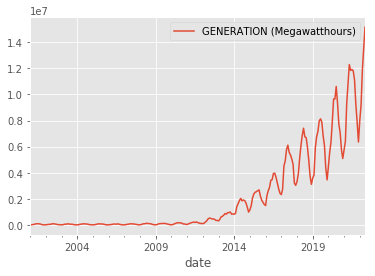

In [70]:
US_sol.plot();

In [71]:
sol2011=US_sol['2011':]

In [72]:
sol2011

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
date,,,,
2011-01-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,39781.57
2011-02-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,85298.54
2011-03-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,122299.61
2011-04-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,164006.23
2011-05-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,190669.11
...,...,...,...,...
2022-01-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,8003896.00
2022-02-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,9202560.00
2022-03-01,US-TOTAL,Total Electric Power Industry,Solar Thermal and Photovoltaic,11890566.00


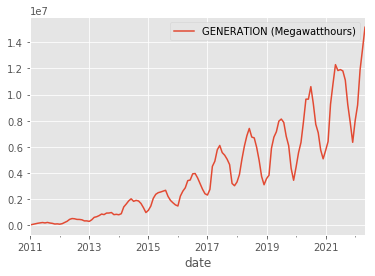

In [73]:
sol2011.plot();

In [74]:
sol2012=US_sol['2012':]

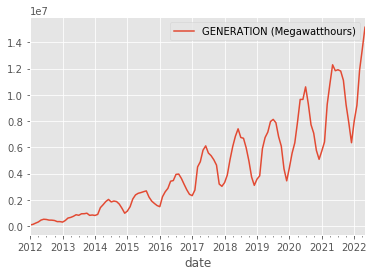

In [75]:
sol2012.plot();

In [76]:
sol11=sol2011["GENERATION (Megawatthours)"]
sol12=sol2012["GENERATION (Megawatthours)"]

### Decomposing solar after 2011

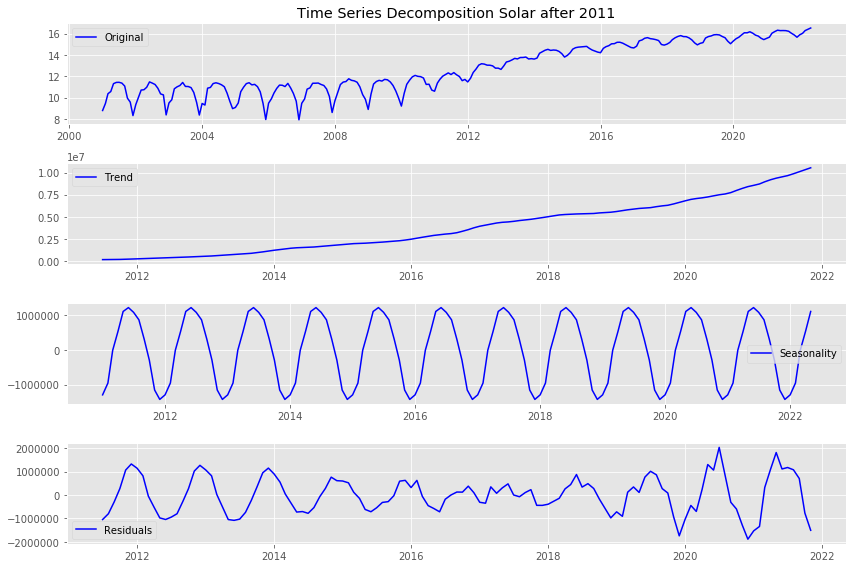

In [77]:
decomposition = seasonal_decompose(sol11)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar after 2011')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [78]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.089199e+00
p-value                        1.046385e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


### Log

In [79]:
decomposition = seasonal_decompose(np.log(sol11))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.037527e+00
p-value                        1.370680e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


### Solar after 2012

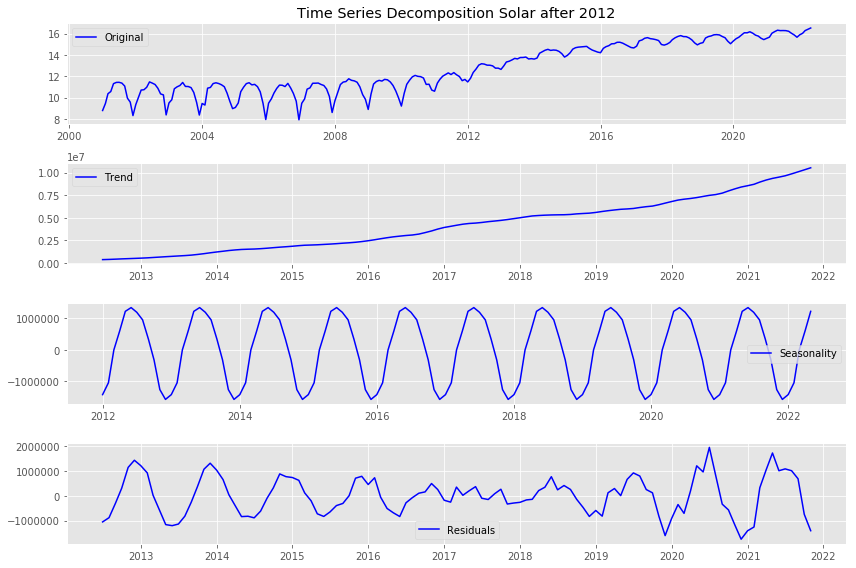

In [80]:
decomposition = seasonal_decompose(sol12)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar after 2012')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [81]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.880925e+00
p-value                        3.079799e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


### Log

In [82]:
decomposition = seasonal_decompose(np.log(sol12))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.763087e+00
p-value                        5.613159e-07
#Lags Used                     7.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


### Multiplicative instead of additive models

Not getting better. Let's try multiplicative instead of additive. Back to the whole series, which performed better.

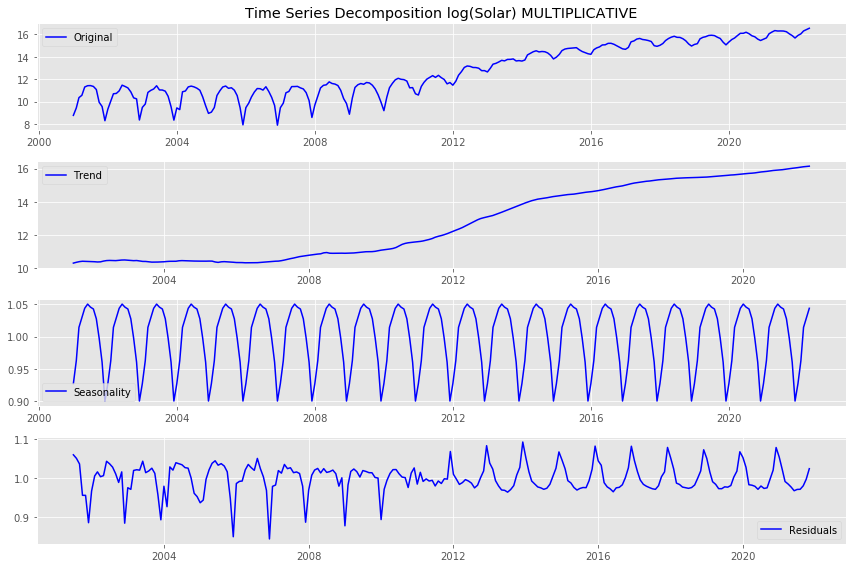

In [83]:
decomposition = seasonal_decompose(np.log(sol), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Solar) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [84]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -5.562180
p-value                          0.000002
#Lags Used                      11.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


Much better!
Now out of curiosity let me try to do multiplicative for the other resources too and see if the residulas improve.

Results of Dickey-Fuller test: 

Test Statistic                -9.876429e+00
p-value                        3.871505e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


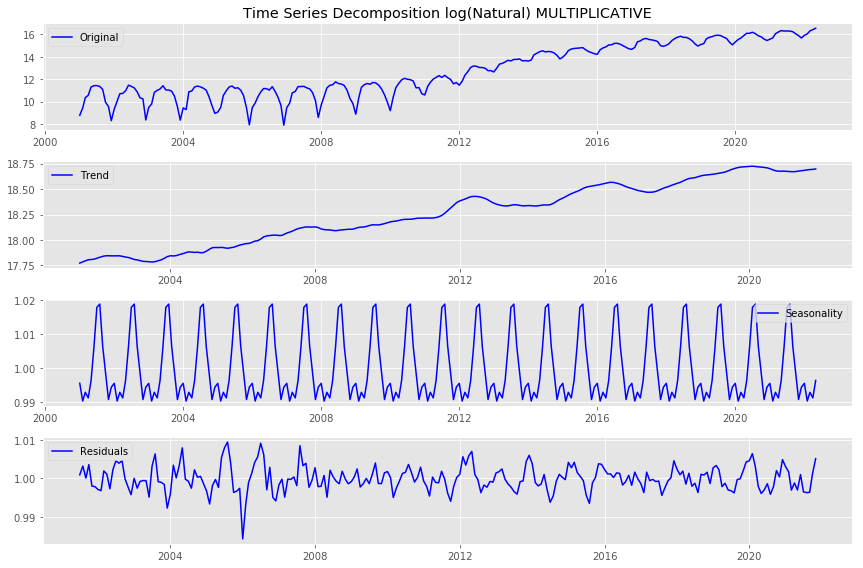

In [85]:
decomposition = seasonal_decompose(np.log(nat), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Natural) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.270774e+00
p-value                        4.800055e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


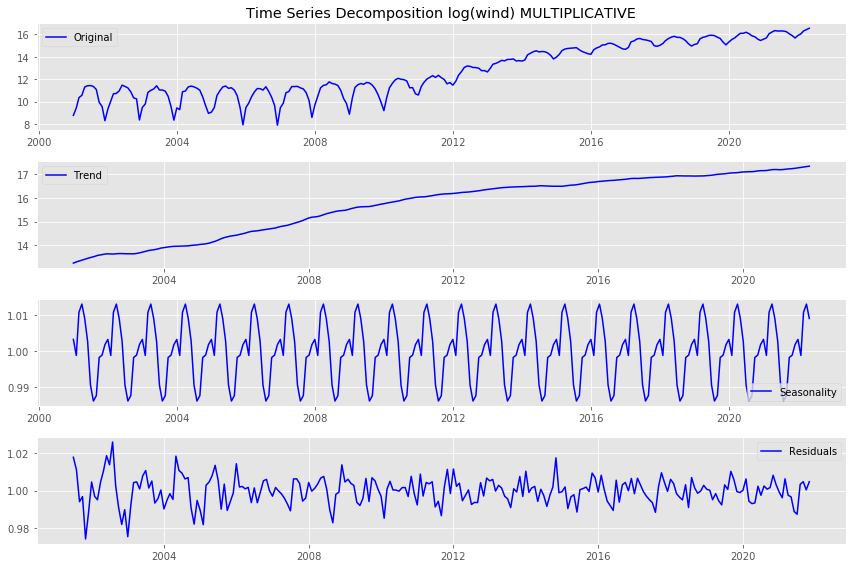

In [86]:
decomposition = seasonal_decompose(np.log(wind), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(wind) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Still unclear if it is multiplicative or no for wind and natural gas, since it is basically the same.
For solar though there seems to be a great improvement with the multiplicative model at least in the scale of the residuals.
But need to stuyd it more because if I do multiplicative non log for some reason it gets worse.

### Multiplicative natural instead of log

Results of Dickey-Fuller test: 

Test Statistic                  -1.261344
p-value                          0.646667
#Lags Used                      12.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


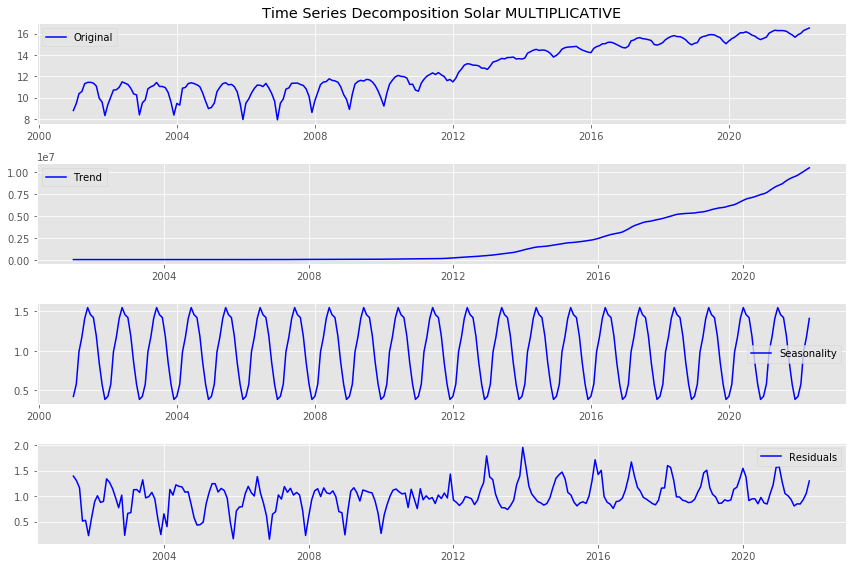

In [87]:
decomposition = seasonal_decompose(sol, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.495130e+00
p-value                        1.199565e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


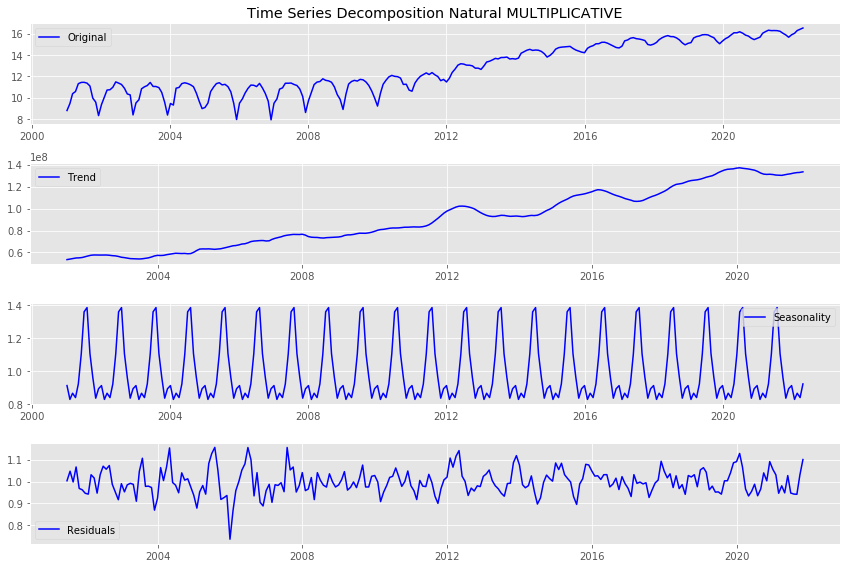

In [88]:
decomposition = seasonal_decompose(nat, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.168402e+00
p-value                        8.755891e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


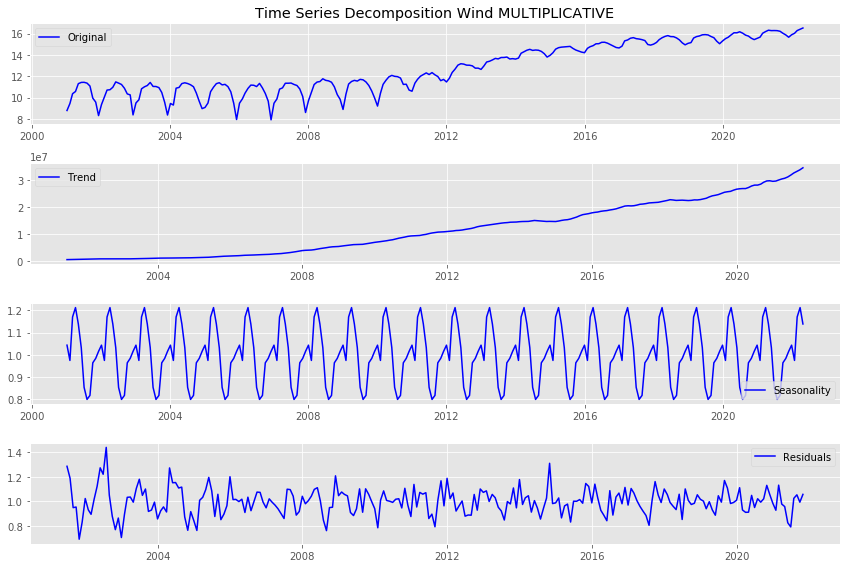

In [89]:
decomposition = seasonal_decompose(wind, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Wind MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Wind and Natural Gas, non log are ok. Solar no.

### BUT
solar eve if it is lower then p result with multiplicative, it still performs better with additive. It's just a bit weird that the residuals are SO HIGH with additive, and yet the dickey fuller test has better results then the much lower scale residulas of the multiplicative model.
> Goot look into this later and figure out.

### Studying Autocorrelation

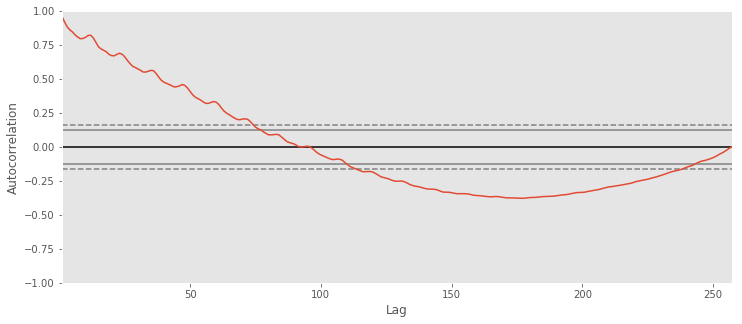

In [90]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(wind);

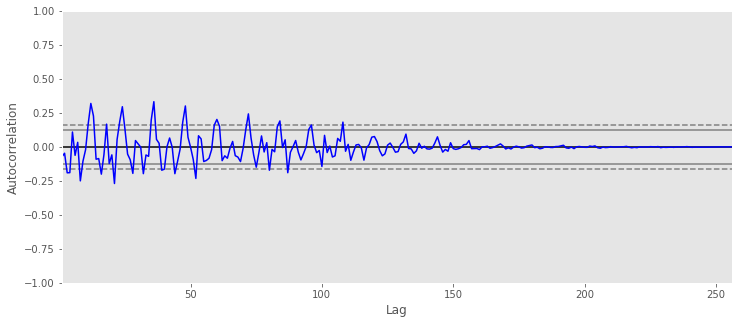

In [91]:
wind_diff = wind.diff(periods=1)
wind_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(wind_diff, color='b');

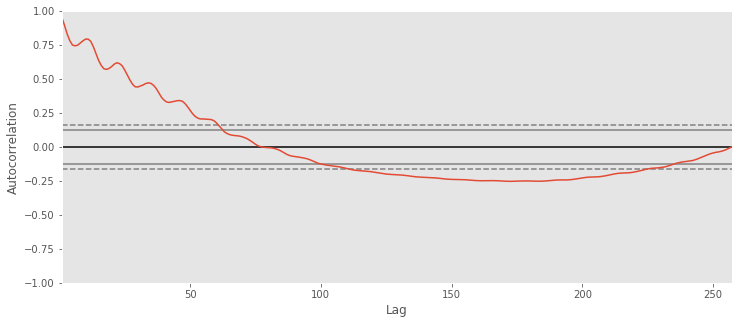

In [92]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sol);

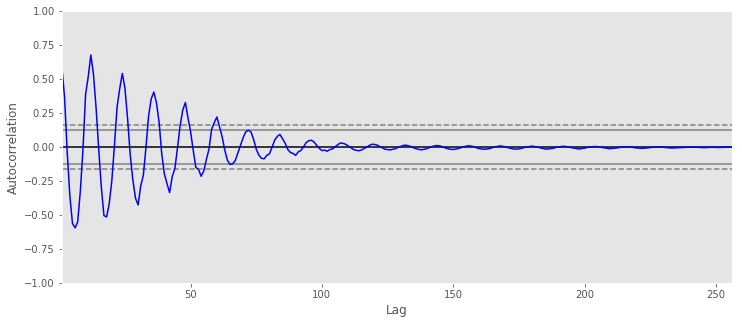

In [93]:
sol_diff = sol.diff(periods=1)
sol_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sol_diff, color='b');

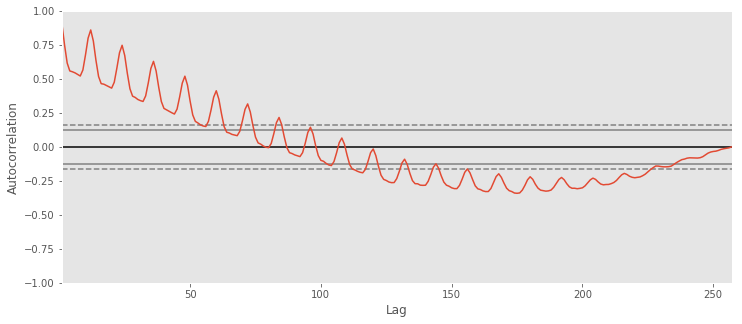

In [94]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nat);

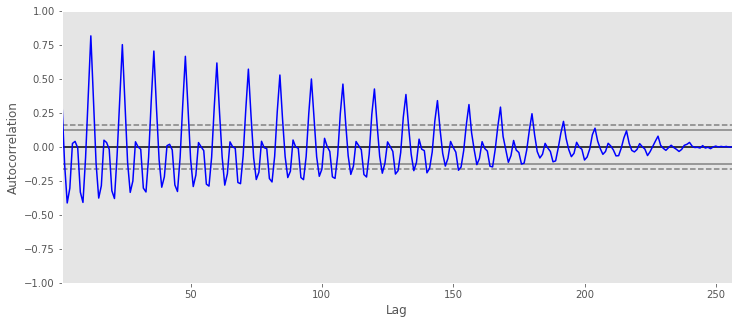

In [122]:
nat_diff = nat.diff(periods=1)
nat_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nat_diff, color='b');

## PACF

### Solar

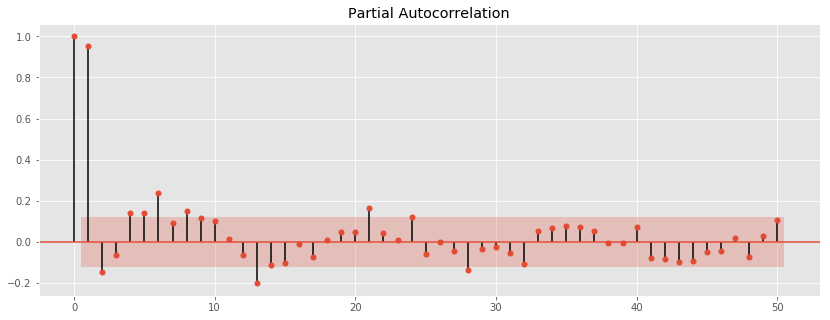

In [96]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(sol, lags=50);

### Natural Gas

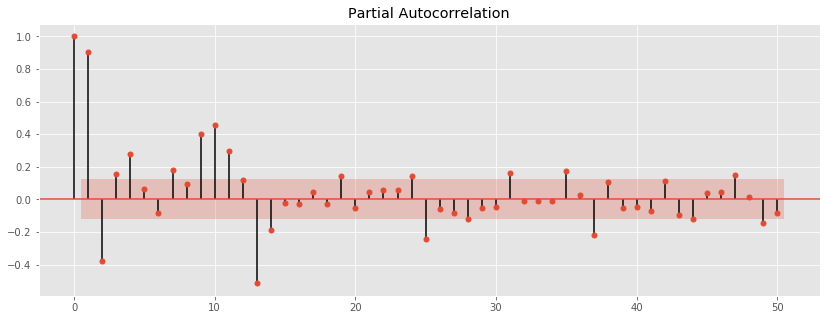

In [97]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat, lags=50);

### Wind

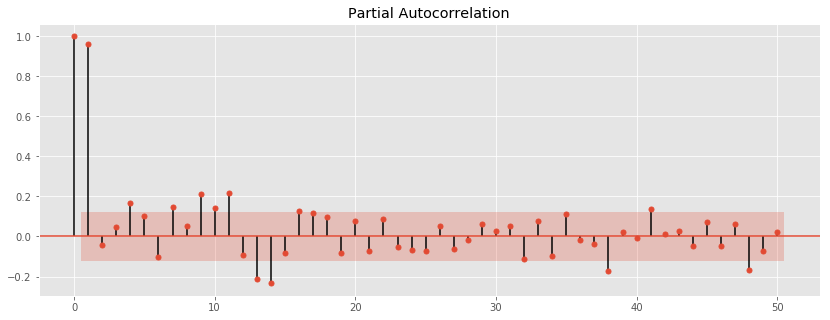

In [98]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(wind, lags=50);

## ACF

### Solar

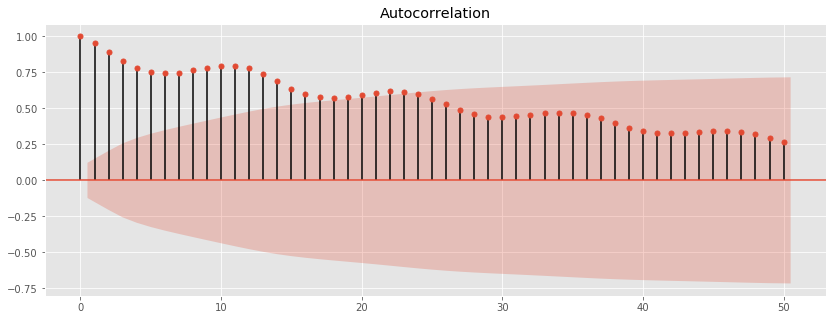

In [107]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol, lags=50);

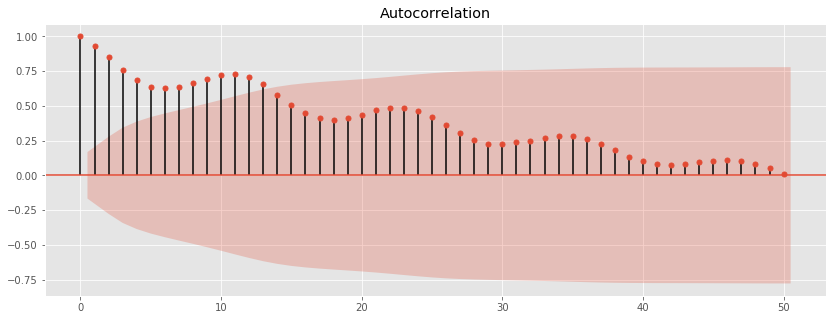

In [104]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol11, lags=50);

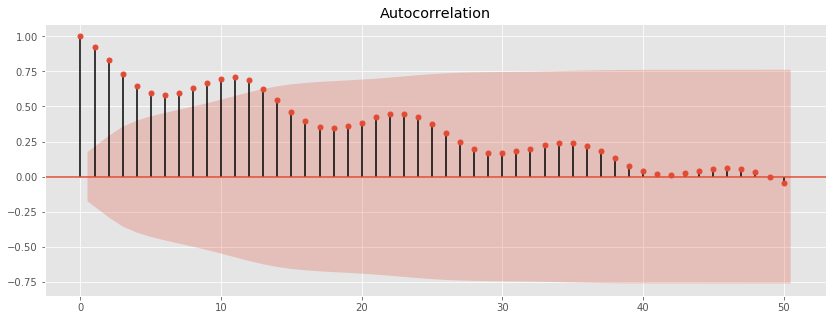

In [105]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol12, lags=50);

### Natural Gas

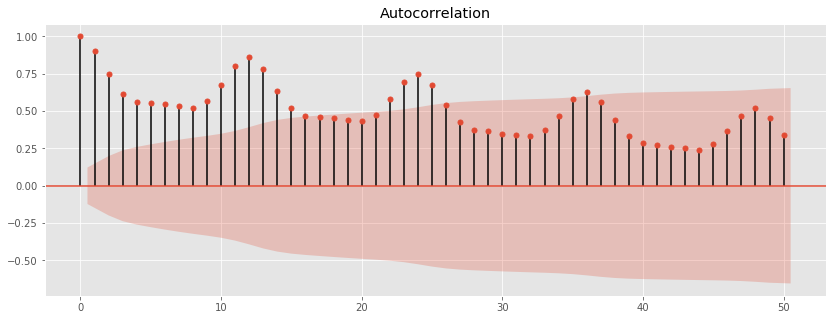

In [100]:

rcParams['figure.figsize'] = 14, 5

plot_acf(nat, lags=50);

### Wind

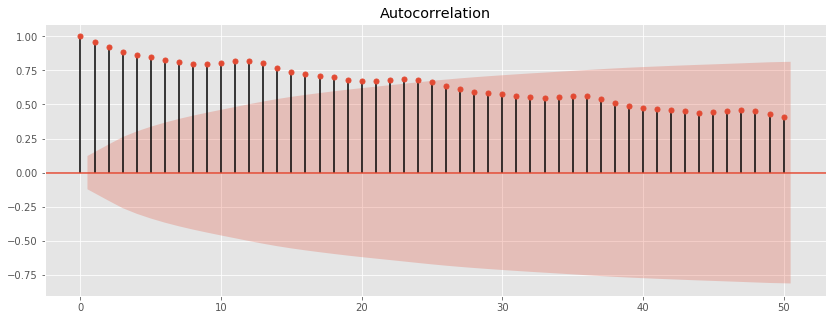

In [101]:

rcParams['figure.figsize'] = 14, 5

plot_acf(wind, lags=50);

### PACF with first difference

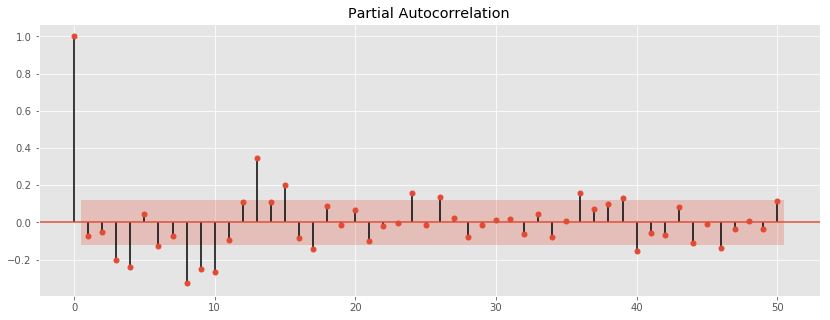

In [110]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(wind_diff, lags=50);

In [121]:
nat

date
2001-01-01     42388663.0
2001-02-01     37966927.0
2001-03-01     44364414.0
2001-04-01     45842746.0
2001-05-01     50934205.0
                 ...     
2022-01-01    136317103.0
2022-02-01    115615259.0
2022-03-01    112002542.0
2022-04-01    105934050.0
2022-05-01    127926186.0
Name: GENERATION (Megawatthours), Length: 257, dtype: float64

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


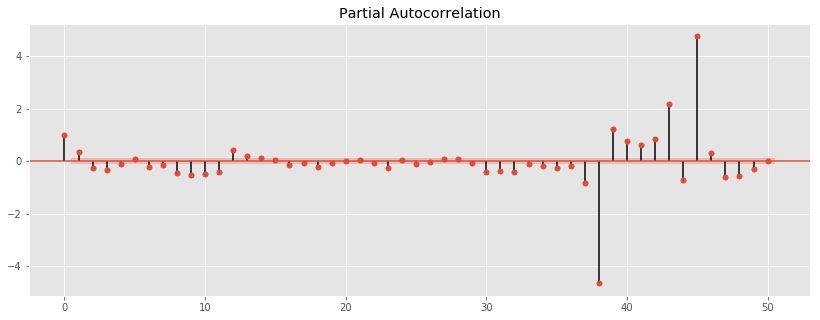

In [123]:
nat_diff = nat.diff(periods=1)
nat_diff.dropna(inplace=True)
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat_diff, lags=50);

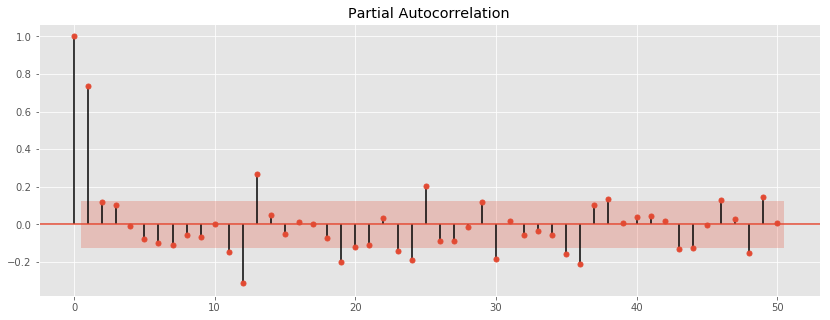

In [124]:
nat_diff = nat.diff(periods=12)
nat_diff.dropna(inplace=True)
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat_diff, lags=50);

> look into this, why with periods = 12 the pacf makes much mores sense

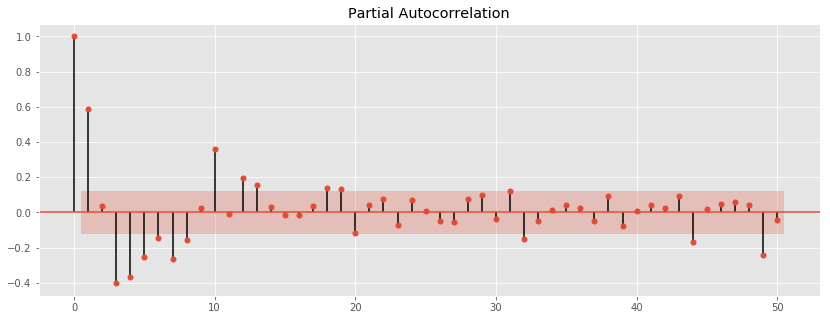

In [112]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(sol_diff, lags=50);

> also: why does the PACF make more sense with the differenced 1 time series? Try to understand this.

> another idea create a DF with one column per source and then see if there is correlation between them
> the correlation can be seen with df.corr( ) and I can also do it on the series that are differenced